In [1]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import warnings
warnings.filterwarnings('ignore')

# What game has the most earnings?

In [2]:
#read datasets
country_df = pd.read_csv("../datasets/country-and-continent-codes-list.csv")
player_df = pd.read_csv("../datasets/highest_earning_players.csv")
org_df = pd.read_csv("../datasets/highest_earning_teams.csv")

In [3]:
# take a look into each dataframe
country_df.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [4]:
player_df.head()


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [5]:
org_df.head()


,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


### Cleaning Our Dataframes

In [6]:
#country dataframe 

#dropping columns that aren't needed and dropping duplicates, if any
country = country_df[['Continent_Name', 'Country_Name', 'Two_Letter_Country_Code']].drop_duplicates()
country = country.rename(columns = {
    "Two_Letter_Country_Code": 'CountryCode'
})
#see if there are any nans
country.isna().sum()
country = country.dropna()
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 261
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Continent_Name  261 non-null    object
 1   Country_Name    261 non-null    object
 2   CountryCode     261 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [7]:
#player df
player_df.info()
player_df.isna().sum()

#check for duplicate values
player_df.duplicated().value_counts() #nice ! no duplicates found 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


False    1000
dtype: int64

In [8]:
#org df
org_df.info()
org_df.isna().sum()

#check for duplicates
org_df.duplicated().value_counts() #also no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


False    928
dtype: int64

### Which game has the most earnings?

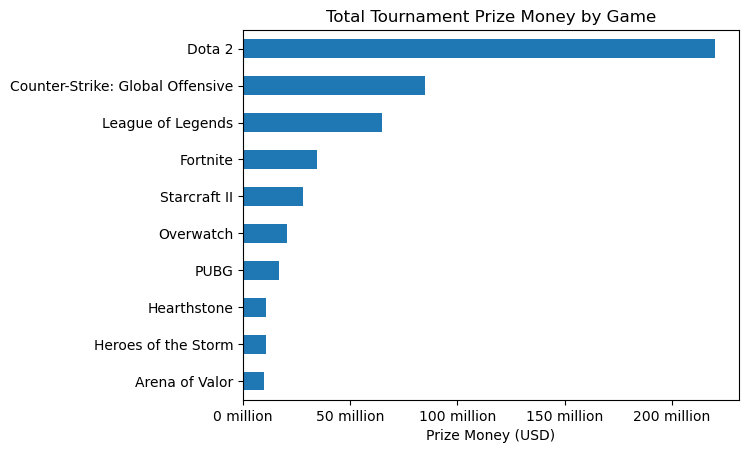

In [9]:
game_earnings = org_df.groupby('Game')['TotalUSDPrize'].sum().sort_values()
fig1 = game_earnings.plot(kind = 'barh', x = 'Game', y = 'TotalUSDPrize')
fig1.set_xticklabels(["0 million", "50 million", "100 million", "150 million", "200 million"])
fig1.set_xlabel('Prize Money (USD)')
fig1.set_ylabel("")
fig1.set_title('Total Tournament Prize Money by Game')
plt.show()

### Which players have the most earnings?

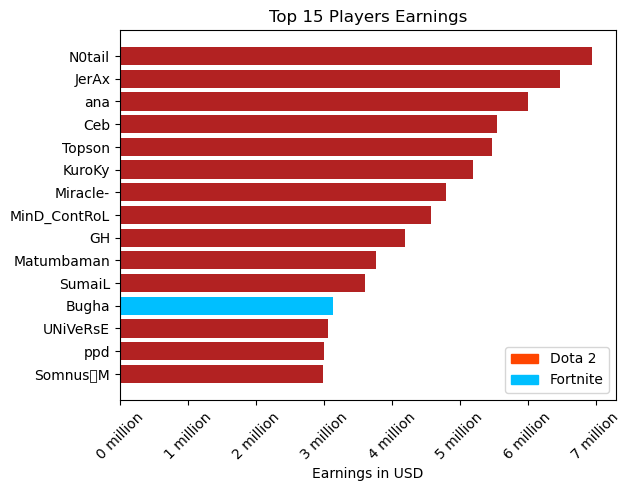

In [10]:
player_earnings = player_df.sort_values(by = 'TotalUSDPrize', ascending=False).head(15)
plt2_data = player_earnings[['CurrentHandle', 'TotalUSDPrize', 'Game']]
plt2_data = plt2_data.sort_values(by = 'TotalUSDPrize')
colors = {
    'Dota 2': 'firebrick',
    'Fortnite': 'deepskyblue'
}
plt.barh(plt2_data['CurrentHandle'], plt2_data['TotalUSDPrize'], color = [colors[game] for game in plt2_data['Game']])
plt.title('Top 15 Players Earnings')
plt.xlabel('Earnings in USD')
plt.xticks(ticks = np.arange(0,8000000, 1000000),
           labels = ['0 million', '1 million', '2 million', '3 million','4 million', '5 million', '6 million', '7 million'],
           rotation = 45)
#Creating custom legend
dota_label = mpatches.Patch(color = 'orangered', label = 'Dota 2')
fortnite_label = mpatches.Patch(color = 'deepskyblue', label = 'Fortnite')
plt.legend(handles = [dota_label, fortnite_label])

#### Seems like Dota 2 dominates all the other esports, so let's look into top 3 player earnings by game!

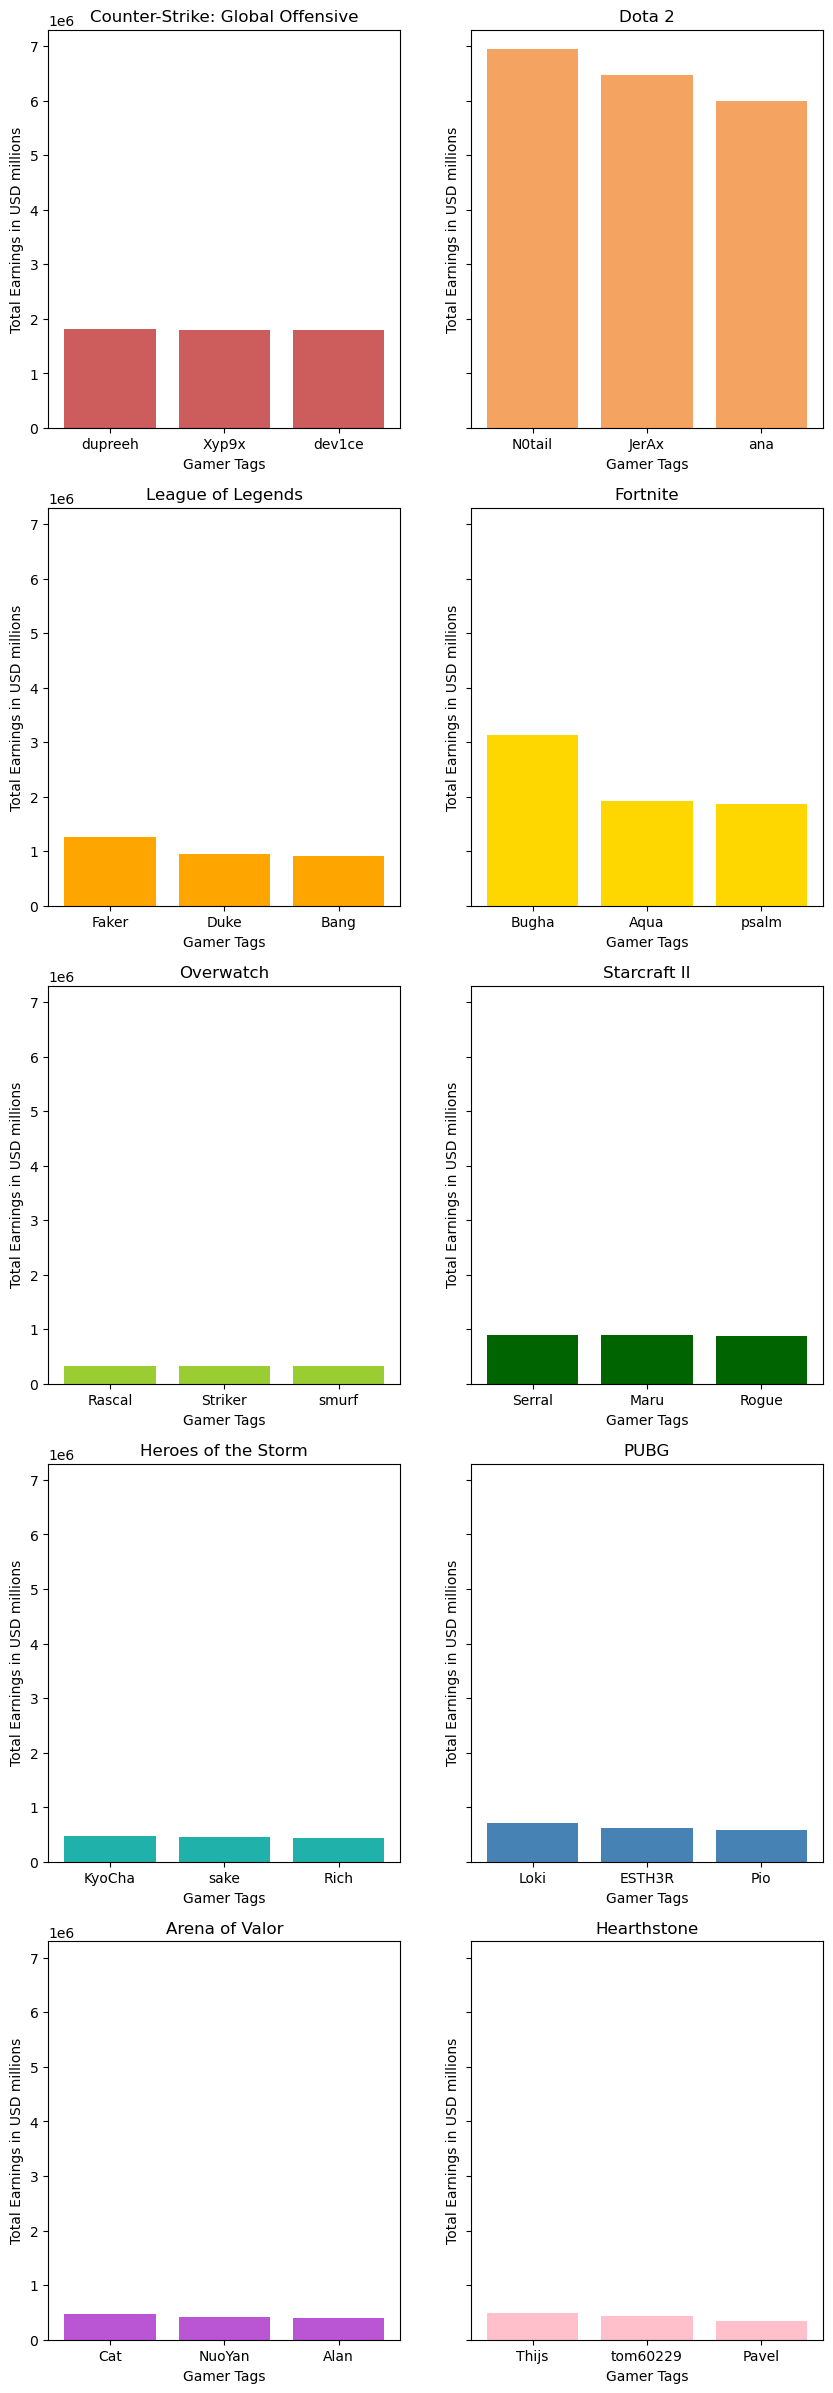

In [11]:
game_list = player_df['Game'].unique()

cs_players = player_df.loc[player_df['Game'] == game_list[0]].sort_values(by = 'TotalUSDPrize', ascending=False).head(3)

#create separate dataframes
games = []
         

for i in range(len(game_list)):
    games.append(pd.DataFrame(player_df.loc[player_df['Game'] == game_list[i]].sort_values(by = 'TotalUSDPrize', ascending=False).head(3)))


#plotting
game_colors = ['indianred', 'sandybrown', 'orange', 'gold', 'yellowgreen', 
               'darkgreen', 'lightseagreen', 'steelblue', 'mediumorchid', 'pink']

fig, axes = plt.subplots(5, 2, figsize = (10,30), sharey = True)
i=0
for row in range(5):
    for col in range(2):
        axes[row, col].bar(games[i]['CurrentHandle'], games[i]['TotalUSDPrize'], color = game_colors[i])
        axes[row, col].set_ylabel('Total Earnings in USD millions')
        axes[row, col].set_xlabel('Gamer Tags')
        axes[row, col].set_title(games[i]['Game'].min())

        i+=1

### Which countries have the most esports earnings?

In [12]:
#cleaning up data
player_df['CountryCode'] = player_df['CountryCode'].str.upper()
player_df.head()
country_earnings = player_df.merge(country, on = 'CountryCode', how = 'left')
country_data = pd.DataFrame(country_earnings.groupby('Country_Name')['TotalUSDPrize'].sum()).reset_index()
#plotting
country_earnings_data = dict(
    type = 'choropleth',
    colorscale = 'Jet',
    locations = country_data['Country_Name'],
    locationmode = "country names",
    z = country_data['TotalUSDPrize'],
    colorbar = {'title' : 'Total Earnings in USD'},
)
layout = dict(
    title = 'Earnings in USD',
    geo = dict(showframe = False, projection = {'type': 'mercator'}),
    autosize = True,
    width = 900
)
chmap = go.Figure(data = country_earnings_data, layout = layout)
chmap.update_layout(title_text = 'Earnings in USD by Country', title_x = 0.5, title_y = .1)
chmap.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
iplot(chmap)

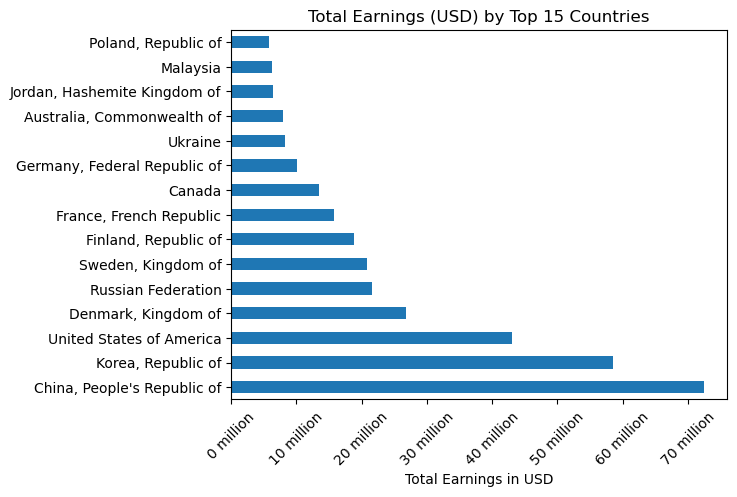

In [13]:
country_data_bar_data = country_data.sort_values(by = 'TotalUSDPrize', ascending = False).head(15)
plt3 = country_data_bar_data.plot(kind = 'barh', x='Country_Name', y = 'TotalUSDPrize')
plt3.set_xlabel('Total Earnings in USD')
plt3.set_ylabel('')
plt3.set_xticklabels(["0 million", "10 million", "20 million", "30 million", "40 million",
                      "50 million", "60 million", "70 million"], rotation = 45)
plt3.set_title('Total Earnings (USD) by Top 15 Countries')
plt3.get_legend().remove()
plt.show()


### Which organization has the most earnings?

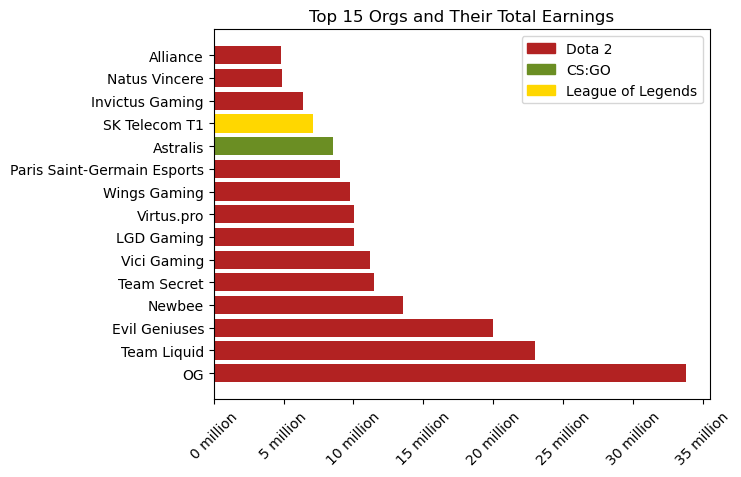

array(['Overwatch', 'Starcraft II', 'League of Legends', 'Fortnite',
       'Counter-Strike: Global Offensive', 'Dota 2', 'PUBG',
       'Heroes of the Storm', 'Hearthstone', 'Arena of Valor'],
      dtype=object)

In [14]:
org_earnings = org_df.sort_values(by = 'TotalUSDPrize', ascending=False).head(15).reset_index()

colors_orgs = {
    'Dota 2': 'firebrick',
    'Counter-Strike: Global Offensive': 'olivedrab',
    'League of Legends': 'gold'
}


plt.barh(org_earnings['TeamName'], org_earnings['TotalUSDPrize'], color = [colors_orgs[game] for game in org_earnings['Game']])
plt.title('Top 15 Orgs and Their Total Earnings')
plt.xticks(np.arange(0, 40000000, 5000000),
           ['0 million', '5 million', '10 million', '15 million', '20 million', '25 million', '30 million', '35 million'],
           rotation = 45)
#Creating custom legend
dota_org_label = mpatches.Patch(color = 'firebrick', label = 'Dota 2')
cs_org_label = mpatches.Patch(color = 'olivedrab', label = 'CS:GO')
lol_org_label = mpatches.Patch(color = 'gold', label = 'League of Legends')
plt.legend(handles = [dota_org_label, cs_org_label, lol_org_label])
plt.show()
org_df['Game'].unique()

#### Surprise! Dota 2 dominates once again. Let's look at the top 3 orgs for each game now.

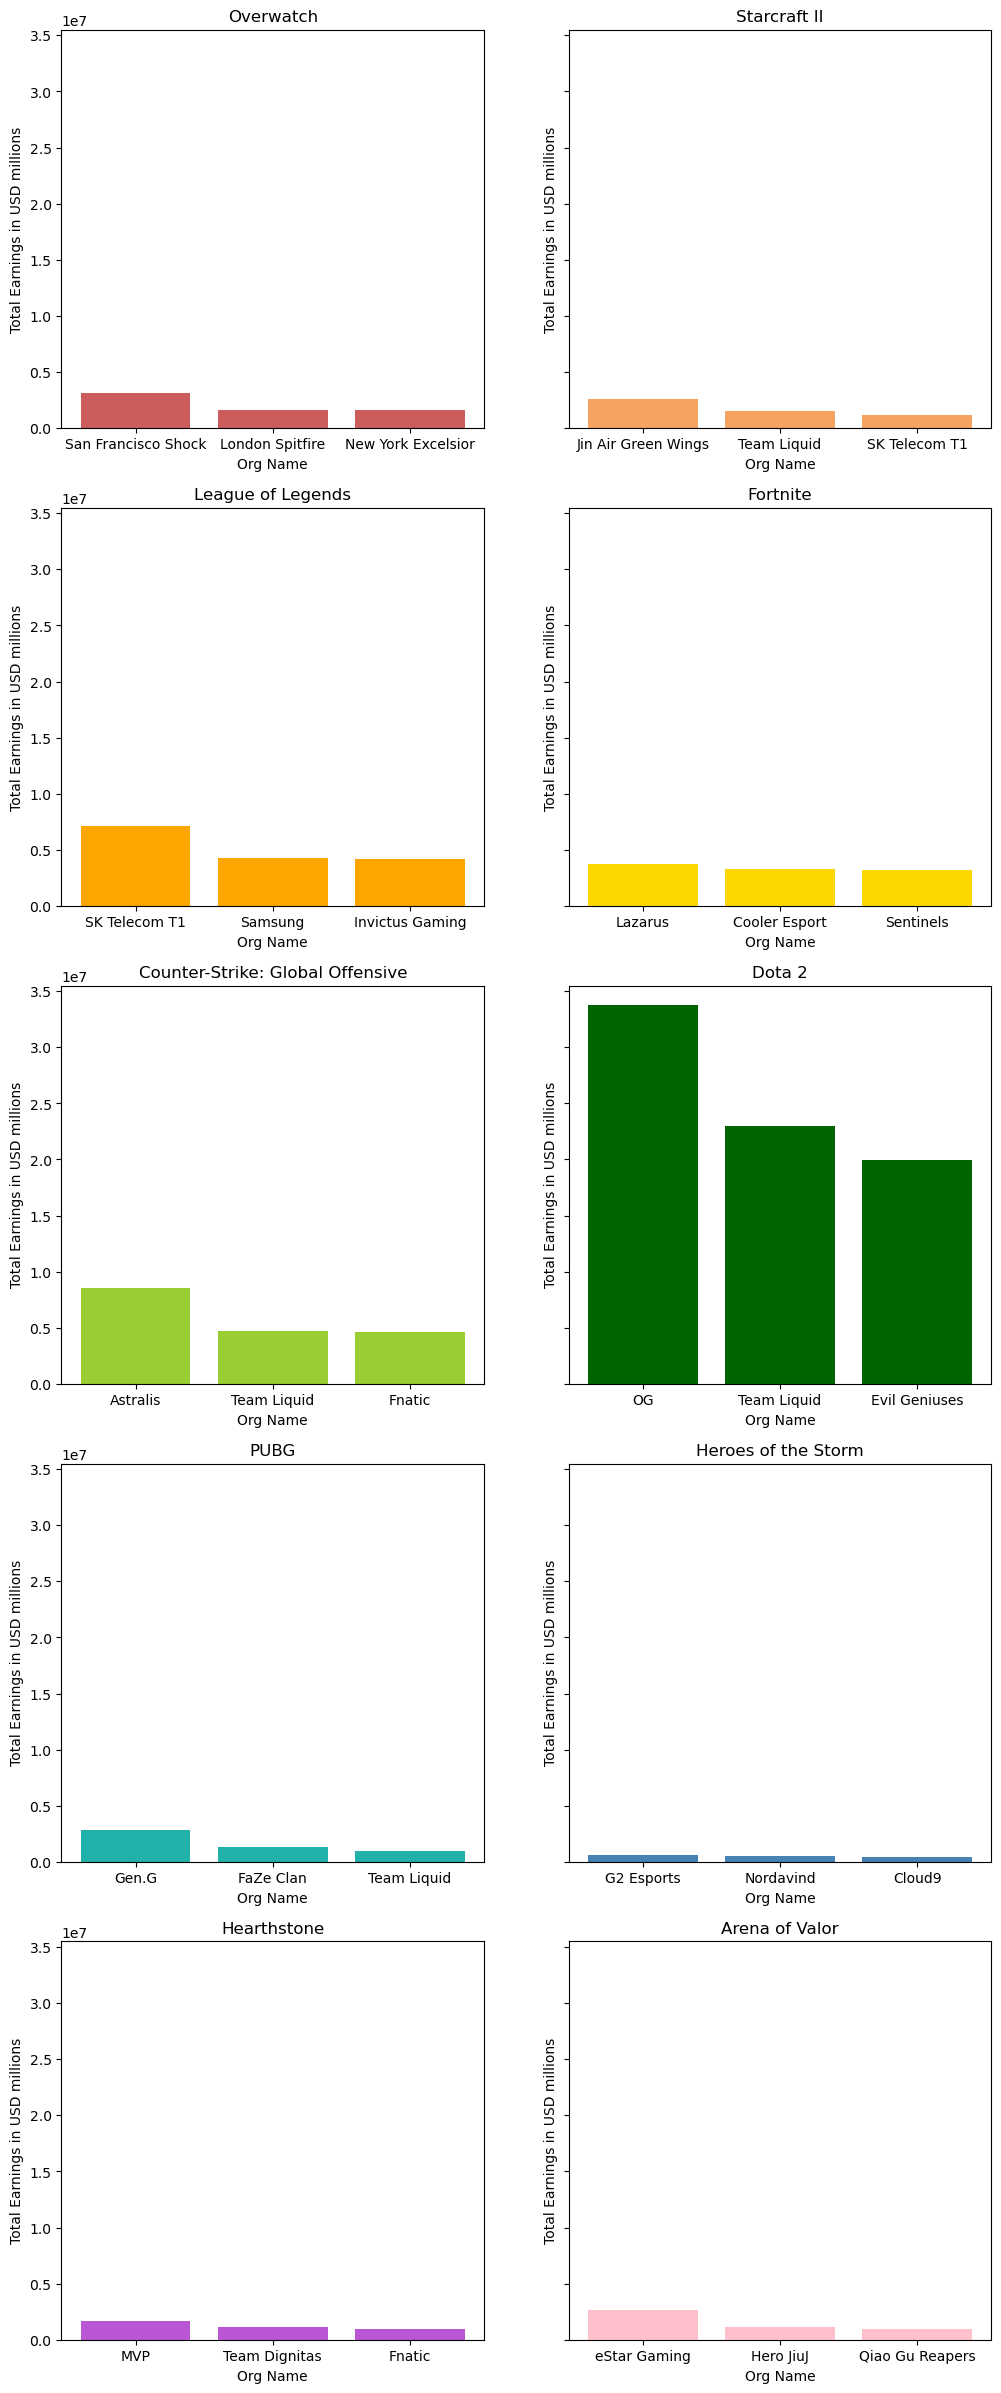

In [15]:
game_list_org = org_df['Game'].unique()

#create separate dataframes

games_org = []

for i in range(len(game_list_org)):
    games_org.append(org_df.loc[org_df['Game'] == game_list_org[i]].sort_values(by = 'TotalUSDPrize', ascending=False).head(3))


#plotting
game_colors_org = ['indianred', 'sandybrown', 'orange', 'gold', 'yellowgreen', 
               'darkgreen', 'lightseagreen', 'steelblue', 'mediumorchid', 'pink']

fig, axes = plt.subplots(5, 2, figsize = (12,30), sharey = True)
i=0
for row in range(5):
    for col in range(2):
        axes[row, col].bar(games_org[i]['TeamName'], games_org[i]['TotalUSDPrize'], color = game_colors_org[i])
        axes[row, col].set_ylabel('Total Earnings in USD millions')
        axes[row, col].set_xlabel('Org Name')
        axes[row, col].set_title(games_org[i]['Game'].min())

        i+=1


### Is there a relationship between number of tournaments and tournament earnings?

The r value is 0.20


Text(0.5, 0, 'Total Tournaments Entered')

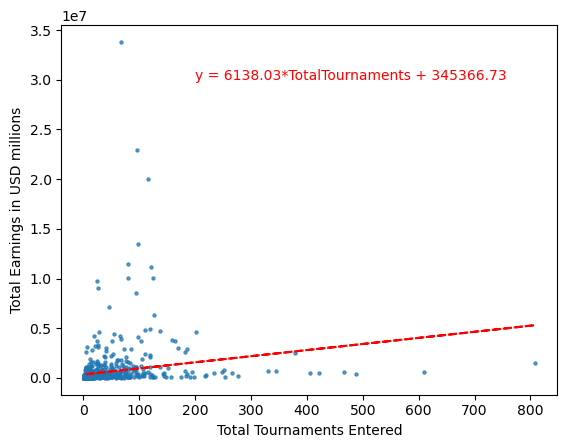

In [37]:
x = org_df['TotalTournaments']
y = org_df['TotalUSDPrize']
plt.scatter(x, y, s = 5, alpha = 0.7)
slope, int, r, p, st_err = stats.linregress(x, y)
fit = slope * x + int
str_fit = f'y = {slope:.2f}*TotalTournaments + {int:.2f}'
plt.plot(x, fit, '--', color = 'red')
plt.text(200,30000000,str_fit, color = 'red')
print(f'The r value is {r:.2f}')
plt.ylabel('Total Earnings in USD millions')
plt.xlabel('Total Tournaments Entered')

### Not really, with a coefficient of determination of 0.04, just because your org is more active, doesn't mean you'll make more money.

#### Seems like there is an uneven distribution of tournaments entered, so let's see if there is a relationship when we eliminate outliers

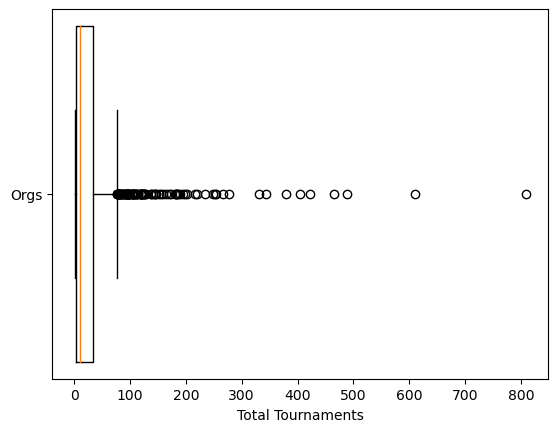

In [62]:
plt.boxplot(org_df['TotalTournaments'], vert = False, widths= 70)
plt.xlabel('Total Tournaments')
plt.yticks([1], ['Orgs'])
plt.show()


In [28]:
q1 = org_df['TotalTournaments'].quantile(0.25)
q3 = org_df['TotalTournaments'].quantile(0.75)
iqr = q3 -q1
drop_outliers = org_df.loc[(org_df['TotalTournaments'] > q1 - (iqr*1.5)) & (org_df['TotalTournaments'] < q3 + (iqr*1.5))]

76

The r value is 0.26


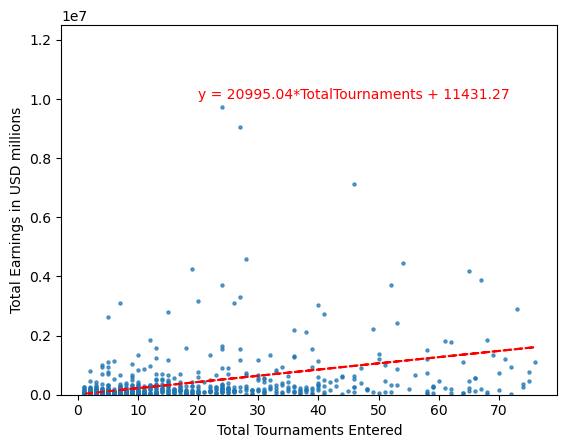

In [36]:
x2 = drop_outliers['TotalTournaments']
y2 = drop_outliers['TotalUSDPrize']
plt.scatter(x2, y2, s = 5, alpha = 0.7)
slope2, int2, r2, p2, st_err2 = stats.linregress(x2, y2)
fit2 = slope2 * x2 + int2
str_fit2 = f'y = {slope2:.2f}*TotalTournaments + {int2:.2f}'
plt.plot(x2, fit2, '--', color = 'red')
plt.text(20,10000000,str_fit2, color = 'red')
print(f'The r value is {r2:.2f}')
plt.ylim(0, 12500000)
plt.ylabel('Total Earnings in USD millions')
plt.xlabel('Total Tournaments Entered')
plt.show()

In [326]:
#Dependencies
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import os
import csv 

In [327]:
#Grab CSV and read dataset


he_teams_df = pd.read_csv('/Users/jbyrd326/Desktop/Home/Certifications/Project1_EdX/datasets/highest_earning_teams.csv')
#highest_earning_teams

he_players_df = pd.read_csv('/Users/jbyrd326/Desktop/Home/Certifications/Project1_EdX/datasets/highest_earning_players.csv')
#highest_earning_players

county_and_content_df = pd.read_csv('/Users/jbyrd326/Desktop/Home/Certifications/Project1_EdX/datasets/country-and-continent-codes-list.csv')
#county_and_content


In [328]:
# Cleaning the Datasets (TEAMS)
    #View Dataset

he_teams_df


,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [329]:
# Cleaning the Datasets (TEAMS)
    #Drop Duplicates | No Duplicates Found

he_teams_df.drop_duplicates()


,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [330]:
# Cleaning the Datasets (TEAMS)
    #Remove TeamId Column

he_teams_df = he_teams_df.drop (columns = 'TeamId')
he_teams_df


,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...
923,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [331]:
# Cleaning Datasets (PLAYERS)
    #View Dataset

he_players_df


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [332]:
# Cleaning Datasets (PLAYERS)
    #Drop Duplicates | No Duplicates Found

he_players_df.drop_duplicates()


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [333]:
# Cleaning Datasets (COUNTRY)
    #View Contry Dataset

county_and_content_df


,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [334]:
# Cleaning Datasets (COUNTRY)
    #Drop Duplicates | No Duplicates Found 

county_and_content_df.drop_duplicates()


,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN



What Game is most Popular?

In order to determine this let take the time to define Popularity for our situation.

Criterea for Popularty:
- Amount of Players
        - In what country 
- Earnings (Total amount of Prize money)


Lets Start!


In [335]:
#Preview Teams Dataset 

he_teams_df

,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...
923,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [336]:
#See which Genre type is accounted for most (TEAMS)

he_teams_df['Genre'].value_counts()


Multiplayer Online Battle Arena    348
First-Person Shooter               200
Battle Royale                      200
Strategy                           100
Collectible Card Game               80
Name: Genre, dtype: int64

In [337]:
#Based on % (TEAMS)

he_teams_df['Genre'].value_counts(normalize=True).mul(100).round(2).astype(str)+ '%'


Multiplayer Online Battle Arena     37.5%
First-Person Shooter               21.55%
Battle Royale                      21.55%
Strategy                           10.78%
Collectible Card Game               8.62%
Name: Genre, dtype: object

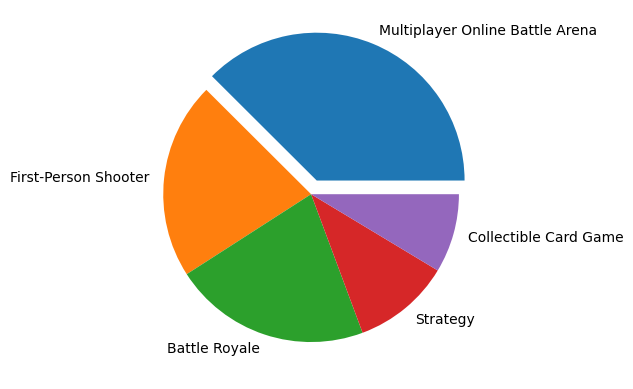

In [338]:
#Create a Pie chart based on the %'s each Genre accounts for (TEAMS)

y = np.array([37.5, 21.55, 21.55, 10.7, 8.62])
Genres = ['Multiplayer Online Battle Arena', 'First-Person Shooter', 'Battle Royale', 'Strategy', 'Collectible Card Game']
explode = [0.1, 0, 0, 0,0]

plt.pie(y, labels = Genres, explode=explode)
plt.show() 



Per the above Pie Chart it looks as if "Multiplayer Online Battle Arena" Games are the most popular genre of game played

Lets check this by looking at another Dataset

In [339]:
 #Preview Players Dataset

he_players_df

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [340]:
#See which Genre type is accounted for most (PLAYERS)

he_players_df['Genre'].value_counts()

Multiplayer Online Battle Arena    400
First-Person Shooter               200
Battle Royale                      200
Strategy                           100
Collectible Card Game              100
Name: Genre, dtype: int64

In [341]:
#Based on % (PLAYERS)
    #based on both %'s from both Datasets (Team & Player) it looks as if there is simularity in Genre Popularity

he_players_df['Genre'].value_counts(normalize=True).mul(100).round(2).astype(str)+ '%'


Multiplayer Online Battle Arena    40.0%
First-Person Shooter               20.0%
Battle Royale                      20.0%
Strategy                           10.0%
Collectible Card Game              10.0%
Name: Genre, dtype: object

In [342]:
#RECAP of the Teams dataset % for comparision. (TEAM)

he_teams_df['Genre'].value_counts(normalize=True).mul(100).round(2).astype(str)+ '%'

Multiplayer Online Battle Arena     37.5%
First-Person Shooter               21.55%
Battle Royale                      21.55%
Strategy                           10.78%
Collectible Card Game               8.62%
Name: Genre, dtype: object

Based on the %'s from both Dataset (Team & Player) is looks as if there is a simular trend! 

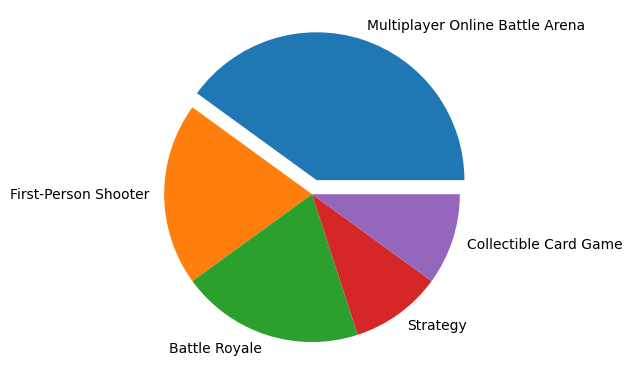

In [343]:
#Create a Pie Chart for the Players Dataset for added visual comparison (PLAYERS)
    #very simular to the Teams Dataset!
 
y = np.array([40, 20, 20, 10, 10])
Genres = ['Multiplayer Online Battle Arena', 'First-Person Shooter', 'Battle Royale', 'Strategy', 'Collectible Card Game']
explode = [0.1, 0, 0, 0,0]

plt.pie(y, labels = Genres, explode=explode)
plt.show() 




So it looks as if the Most Popular Genre to be played by gamers is "Multiplayer Online Battle Arena" games based on the Teams & Players Datasets

Next, let look to see if this holds true with Countries in the top10 player counts


In [344]:
#Preiew Player Dataset

he_players_df


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [346]:
#Gather Player Counts by Country

player_count_by_country = he_players_df.groupby("CountryCode")["Genre"].count()
player_count_by_country.head()


CountryCode
ar    3
at    3
au    5
ba    1
be    5
Name: Genre, dtype: int64

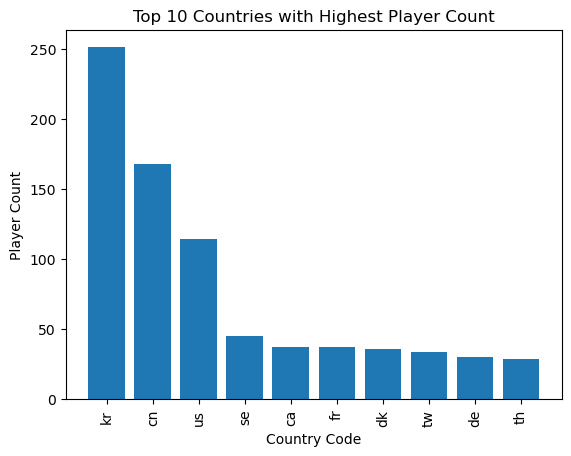

In [347]:
#Create a Bar Chart to show the top10 Countries w/ the highest player count

# Group the data by CountryCode and count the number of players
player_count_by_country = he_players_df.groupby("CountryCode")["Genre"].count()
# Sort the player count in descending order and select the top 10 countries
top_10_countries = player_count_by_country.nlargest(10)
# Create a bar chart
plt.bar(top_10_countries.index, top_10_countries.values)
# Set the x-axis label
plt.xlabel('Country Code')
# Set the y-axis label
plt.ylabel('Player Count')
# Set the title of the bar chart
plt.title('Top 10 Countries with Highest Player Count')
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)
# Display the bar chart
plt.show()



Now that we have our top10 countries with the highest player counts, let look to see the hightest Genres played in each Contry.


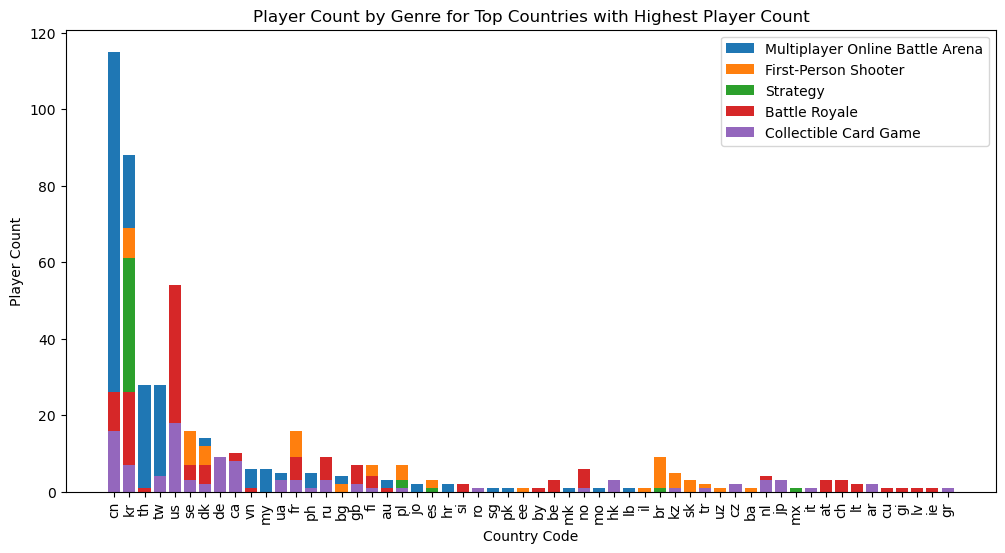

In [348]:
# Group the data by CountryCode and Genre, and count the number of players
player_count_by_country_genre = he_players_df.groupby(["CountryCode", "Genre"])["PlayerId"].count()
# Reset the index to access the grouped data
player_count_by_country_genre = player_count_by_country_genre.reset_index()
# Sort the data by player count in descending order
sorted_player_count = player_count_by_country_genre.sort_values(by="PlayerId", ascending=False)
# Select the top 10 countries with the highest player count
top_10_countries = sorted_player_count.groupby("CountryCode").head(10)
# Create a bar chart for each genre in the top countries
fig, ax = plt.subplots(figsize=(12, 6))
for genre in top_10_countries["Genre"].unique():
    genre_data = top_10_countries[top_10_countries["Genre"] == genre]
    ax.bar(genre_data["CountryCode"], genre_data["PlayerId"], label=genre)
# Set the x-axis label
ax.set_xlabel('Country Code')
# Set the y-axis label
ax.set_ylabel('Player Count')
# Set the title of the bar chart
ax.set_title('Player Count by Genre for Top Countries with Highest Player Count')
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)
# Add a legend to the chart
ax.legend()
# Display the bar chart
plt.show()



Based on the Graph above it looks as if "Multiplayer Online Battle Arena" is the most Popular Genre played in the 5 of the Top10 Countries.
Although not in the majority the Genre "Multiplayer Online Battle Arena" does host 4 Countries in the top5 highest Player Count.

    - Top10: Korea(KR), Chna(CN), United States(US), Sweden(SE) , Canada(CA), France(FR), Denmark(DK) , Tiwan(TW), Germany(DE), Thailand(TH)


Now that we see that "Multiplayer Online Battle Arena" games lead the way in player count by Genre and Country lets take a look to see how well you can profit from them in comparison to other games.

Lets start by looking at Earning Potential and see which Genre Host the most tournaments.


In [349]:
#Check the Amount of Tournaments to see earning potential (TEAMS)
    #Using Teams Dataset

high_earning_genre_df = he_teams_df.groupby('Genre')['TotalTournaments'].sum()
high_earning_genre_df

Genre
Battle Royale                       2057
Collectible Card Game                662
First-Person Shooter                6768
Multiplayer Online Battle Arena     7251
Strategy                           12676
Name: TotalTournaments, dtype: int64

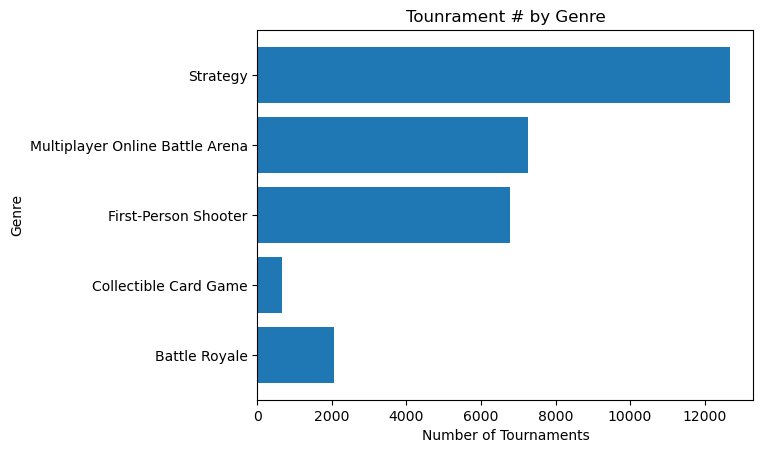

In [350]:
#Create a Bar graph illistrating tournament numbers (TEAMS)
    #Using Teams Dataset

x = np.array(['Battle Royale', 'Collectible Card Game', 'First-Person Shooter', 'Multiplayer Online Battle Arena', 'Strategy'])
y = np.array([2057, 662, 6768, 7251, 12676])

plt.barh(x,y,)
plt.title("Tounrament # by Genre")
plt.xlabel("Number of Tournaments")
plt.ylabel("Genre")
plt.show()



Per the Bar Graph above it looks as if the Genre that has the highest earning potential based on the amount of Tournaments held is "Stragegy" 


Now lets take the time to look at actual earnings based on the Dollar Amounts from Prize Money (USD)


In [351]:
#Check Earning Totals by Genre (TEAMS)
    #Using Teams Dataset

high_earning_teams_df = he_teams_df.groupby('Genre')['TotalUSDPrize'].sum()
for row in high_earning_teams_df:
    row = "{:.8f}".format(row)
high_earning_teams_df


Genre
Battle Royale                      5.137633e+07
Collectible Card Game              1.086453e+07
First-Person Shooter               1.053192e+08
Multiplayer Online Battle Arena    3.056280e+08
Strategy                           2.785615e+07
Name: TotalUSDPrize, dtype: float64

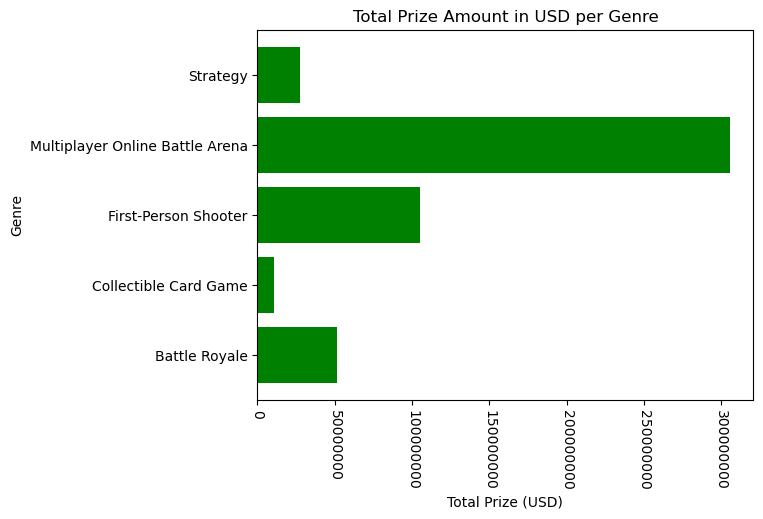

In [352]:

#Create a Bar Graph showing the Total Prize amounts in USD (TEAMS)
    #Using Teams Dataset

from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
plt.barh(high_earning_teams_df.index, high_earning_teams_df, color="green")
plt.title("Total Prize Amount in USD per Genre")
plt.xlabel("Total Prize (USD)")
plt.xticks(rotation= 270)
plt.ylabel("Genre")
plt.ticklabel_format(style='plain',axis='x')
plt.show()


In [353]:
#Check Earning Totals by Genre (PLAYERS)
    #Using Players Dataset

high_earning_players_df = he_players_df.groupby('Genre')['TotalUSDPrize'].sum()
for row in high_earning_players_df:
    row = "{:.8f}".format(row)
high_earning_players_df


Genre
Battle Royale                      5.585133e+07
Collectible Card Game              1.333564e+07
First-Person Shooter               6.888973e+07
Multiplayer Online Battle Arena    2.343367e+08
Strategy                           2.537982e+07
Name: TotalUSDPrize, dtype: float64

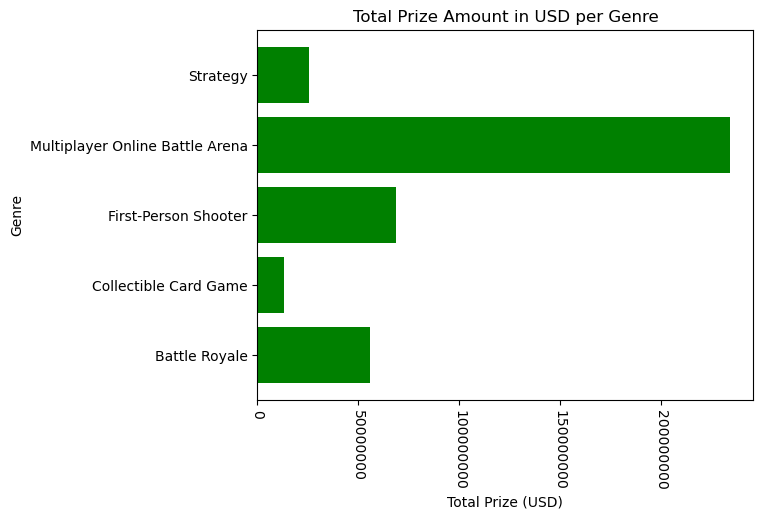

In [354]:
#Create a Bar Graph showing the Total Prize amounts in USD (PLAYERS)
    #Using Players Dataset

from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
plt.barh(high_earning_players_df.index, high_earning_players_df,color="green")
plt.title("Total Prize Amount in USD per Genre")
plt.xlabel("Total Prize (USD)")
plt.xticks(rotation= 270)
plt.ylabel("Genre")
plt.ticklabel_format(style='plain',axis='x')
plt.show()

Per the above Bar Graphs for both Player & Teams Datasets it looks as if the tounatment earnings for the Genre "Multiplayer Online Batlle Arena" far out weigh the earnings for any other Genre.

Now the we can see that the Genre "Muliplayer Online Battle Arena" games are the most played and are the most lucrative lets take the time to see which Game within that Genre is most Popular.

In [356]:
#Preview dataset (Player)

he_players_df


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [375]:
#Check Player Totals by game (Players)
    #Using Players Dataset

game_pc_df = he_players_df.groupby('Game')['PlayerId'].sum()
for row in game_pc_df:
    row = "{:.8f}".format(row)
game_pc_df


Game
Arena of Valor                      5753176
Counter-Strike: Global Offensive    1069065
Dota 2                              1121688
Fortnite                            5469523
Hearthstone                         2592442
Heroes of the Storm                 1797309
League of Legends                   1302847
Overwatch                           3523898
PUBG                                4869821
Starcraft II                         293818
Name: PlayerId, dtype: int64

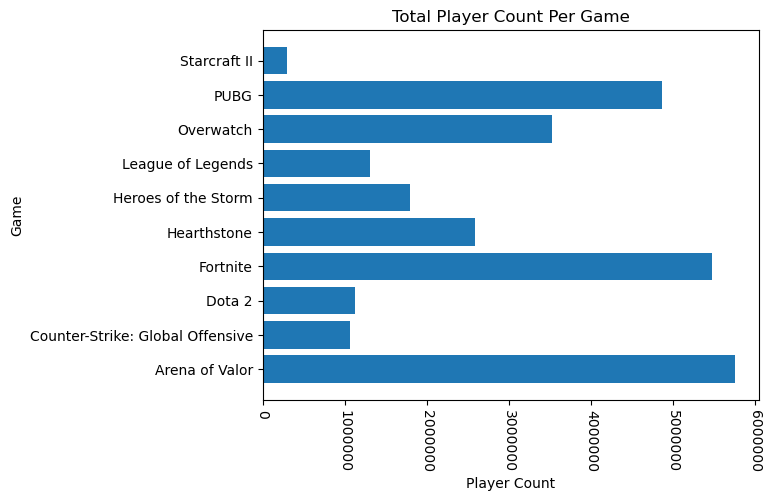

In [370]:
#Create a bar Graph

plt.barh(game_pc_df.index, game_pc_df)
plt.title("Total Player Count Per Game")
plt.xlabel("Player Count")
plt.xticks(rotation= 270)
plt.ylabel("Game")
plt.ticklabel_format(style='plain',axis='x')
plt.show()


In [377]:
#Check Player Totals by game (PLAYERS)
    #Using PLAYERS Dataset

high_earning_game_df = he_players_df.groupby('Game')['TotalUSDPrize'].sum()
for row in high_earning_game_df:
    row = "{:.8f}".format(row)
high_earning_game_df

Game
Arena of Valor                      8.333952e+06
Counter-Strike: Global Offensive    5.654192e+07
Dota 2                              1.791788e+08
Fortnite                            4.340937e+07
Hearthstone                         1.333564e+07
Heroes of the Storm                 1.178045e+07
League of Legends                   3.504348e+07
Overwatch                           1.234781e+07
PUBG                                1.244196e+07
Starcraft II                        2.537982e+07
Name: TotalUSDPrize, dtype: float64

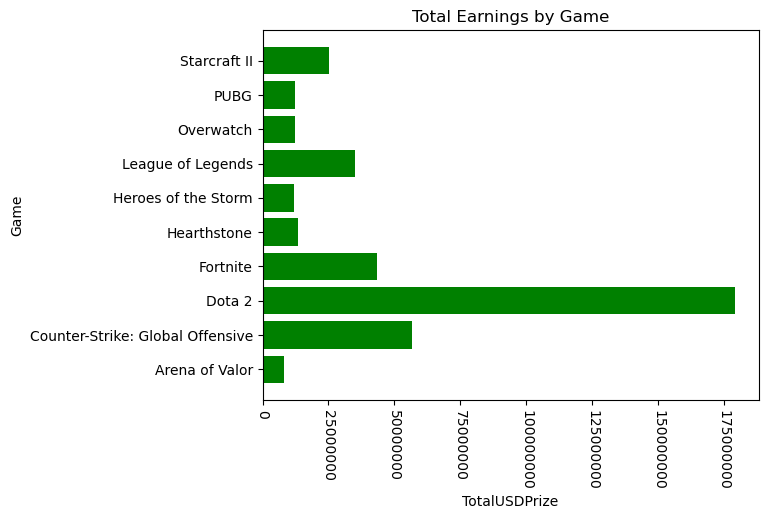

In [385]:
plt.barh(high_earning_game_df.index, high_earning_game_df, color="green")
plt.title("Total Earnings by Game")
plt.xlabel("TotalUSDPrize")
plt.xticks(rotation= 270)
plt.ylabel("Game")
plt.ticklabel_format(style='plain',axis='x')
plt.show()

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv

##  Twitch is an interactive livestreaming service for content spanning gaming, entertainment, sports, music, and more. 

Twitch streamers make money on subscriptions when people pay to watch them play.
First we will graph ttl viwership to this website from 2016 to 2023.


In [120]:

# Open and read csv
twitch_ttl = pd.read_csv("twitch ttl platform viewers.csv")
twitch_ttl

    

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio,DATE
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08,1/1/2016
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98,2/1/2016
2,2016,3,490669308,660389,1591551,7390957,20271,12234,28.92,3/1/2016
3,2016,4,377975447,525696,1775120,6869719,16791,12282,28.80,4/1/2016
4,2016,5,449836631,605432,1438962,7535519,19394,12424,28.85,5/1/2016
...,...,...,...,...,...,...,...,...,...,...
82,2022,11,1694262814,2356415,5362892,21744817,88195,41058,26.84,11/1/2022
83,2022,12,1674092138,2253152,3866814,21753674,84728,41548,27.00,12/1/2022
84,2023,1,1866962462,2512735,5593050,24429476,93349,43611,27.44,1/1/2023
85,2023,2,1712025798,2551454,5364876,22482367,96466,42440,26.58,2/1/2023


Pull January Stats out for each Year

In [121]:
twitch_Jan =twitch_ttl.loc[(twitch_ttl["Month"] == 1)]
twitch_Jan
#Good_Weather_df = city_data_df.loc[(city_data_df["Country"] == 'US') &(city_data_df["Cloudiness"] == 0)&(city_data_df["Humidity"] < 50)]


,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio,DATE
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08,1/1/2016
12,2017,1,601251200,809220,2284184,8672879,24081,14841,28.07,1/1/2017
24,2018,1,720220030,969340,2315343,11222734,33580,18309,26.02,1/1/2018
36,2019,1,949050474,1277322,2278352,17042119,55853,19995,24.38,1/1/2019
48,2020,1,1010010231,1359367,2400513,15053038,52875,21249,25.98,1/1/2020
60,2021,1,2173794168,2925698,6516666,25614207,119448,34551,25.03,1/1/2021
72,2022,1,2162446961,2910426,5674002,27591148,102254,41348,28.61,1/1/2022
84,2023,1,1866962462,2512735,5593050,24429476,93349,43611,27.44,1/1/2023


### Twitch Hour Watched TTL from 2016 - 2023 (Jan) 

The r-squared is: 0.8162284066523569


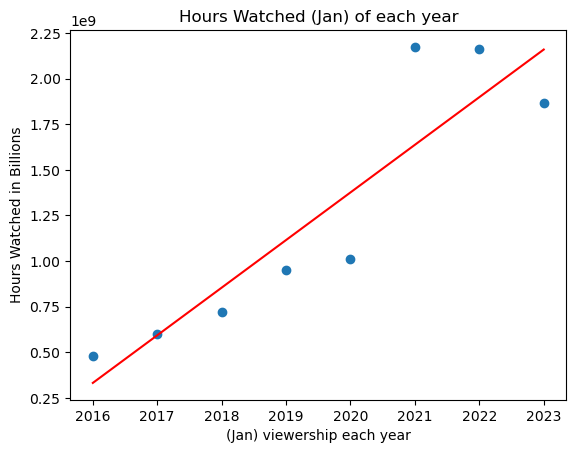

In [174]:
x_values = twitch_Jan['year']
y_values = twitch_Jan['Hours_watched']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('(Jan) viewership each year')
plt.ylabel('Hours Watched in Billions')
plt.title('Hours Watched (Jan) of each year')
print(f"The r-squared is: {rvalue**2}")
plt.show()


## Twitch Streams available TTL from 2016 - 2023 (Jan) 

The r-squared is: 0.8763488566740066


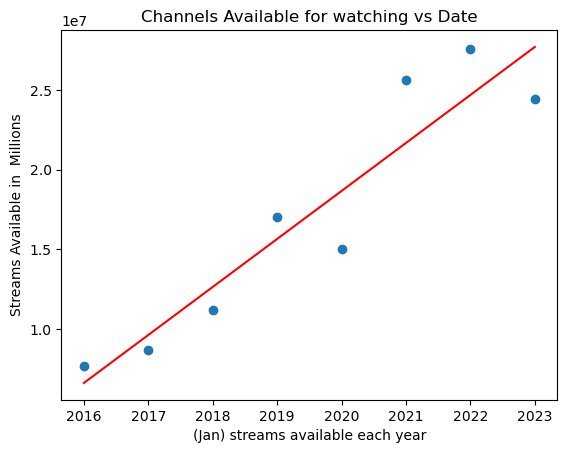

In [179]:
x_values = twitch_Jan['year']
y_values = twitch_Jan['Streams']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('(Jan) streams available each year')
plt.ylabel('Streams Available in  Millions')
plt.title('Channels Available for watching vs Date')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Clearly Twitch viewership is up
Now we analyize the Hours watched by game. 

In [124]:
twitch_by_game = pd.read_csv("Twitch viewrs by game.csv",encoding='cp1252')
twitch_by_game


,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
17395,196,PokÃ©mon Community Game,3,2023,626465,34435,2048,73,1368,843,46,18.19
17396,197,Veiled Experts,3,2023,621189,9266,27928,338,1996,836,12,67.04
17397,198,The Godfather,3,2023,615938,286,58739,4,61,828,0,2153.63
17398,199,RuneScape,3,2023,612387,26245,3330,70,2508,824,35,23.33


Graph Hours watched for top 10 Games 2016 

In [166]:
# try to create new data frame of top ten games for each yr(Jan). First need to reduce ttl list to only top 10 games in Jan
All_Top_10 = twitch_by_game.loc[(twitch_by_game["Rank"] < 11) & (twitch_by_game["Month"] == 1) & (twitch_by_game["Year"] > 2015)]
All_Top_10
#All_Top_10.to_csv("Top10.csv")
# create datfram with only games row
All_Top_10.set_index('Year')

Games_df = All_Top_10[['Game']].copy()
#Games_df
#Games_df.to_csv("Games.csv")
#Drop all duplicate names
ATT = All_Top_10.set_index('Year')
ATT

,Rank,Game,Month,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
Year,,,,,,,,,,,
2016,1,League of Legends,1,94377226,1362044,530270,2903,129172,127021,1833,69.29
2016,2,Counter-Strike: Global Offensive,1,47832863,830105,372654,2197,120849,64378,1117,57.62
2016,3,Dota 2,1,45185893,433397,315083,1100,44074,60815,583,104.26
2016,4,Hearthstone,1,39936159,235903,131357,517,36170,53749,317,169.29
2016,5,Call of Duty: Black Ops III,1,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...
2023,6,Minecraft,1,72872812,1741344,684097,4833,371151,98079,2343,41.85
2023,7,Dota 2,1,43317513,628986,238148,1544,51212,58300,846,68.87
2023,8,Fortnite,1,42715772,4040480,268831,10921,810984,57490,5438,10.57


In [167]:
#Top 10 2015 - 2023
#Drop all duplicate names
Games = Games_df.drop_duplicates(subset='Game', keep='first')
Games



,Game
0,League of Legends
1,Counter-Strike: Global Offensive
2,Dota 2
3,Hearthstone
4,Call of Duty: Black Ops III
5,Minecraft
6,World of Warcraft
7,Z1: Battle Royale
8,Talk Shows & Podcasts
9,FIFA 16


In [184]:

Games_updated = pd.read_csv("Games.csv",encoding='cp1252')
#remove non e-sport 
Games_updated['Game'] = Games_updated['Game'].replace({"PLAYERUNKNOWN'S BATTLEGROUNDS": 'PUBG'})
Games_updated
Games_updated1 = Games_updated.loc[(Games_updated["Game"] != "Just Chatting") ]
#set games as index

Games_updated1
G = Games_updated1.set_index('Game')
G

,2019,2020,2021,2022,2023
Game,,,,,
Fortnite,126502656,53731549,101306583,70296392,42715772
League of Legends,98976171,99657869,170781975,184282005,126494155
Dota 2,46512393,44025208,39545934,44366090,43317513
Counter-Strike: Global Offensive,30778297,33893286,60899705,40012823,39153067
PUBG,29852076,18973733,11953142,0,0
Hearthstone,24477856,21222953,24208283,23783202,14337831
Overwatch,22499093,14476204,15430328,8979640,0
FIFA 19,18618028,0,0,0,0
World of Warcraft,18179362,27563181,44718092,22633405,34357942


## Highest viewers twitch streaming from 2019 to 2023

<Axes: xlabel='Game'>

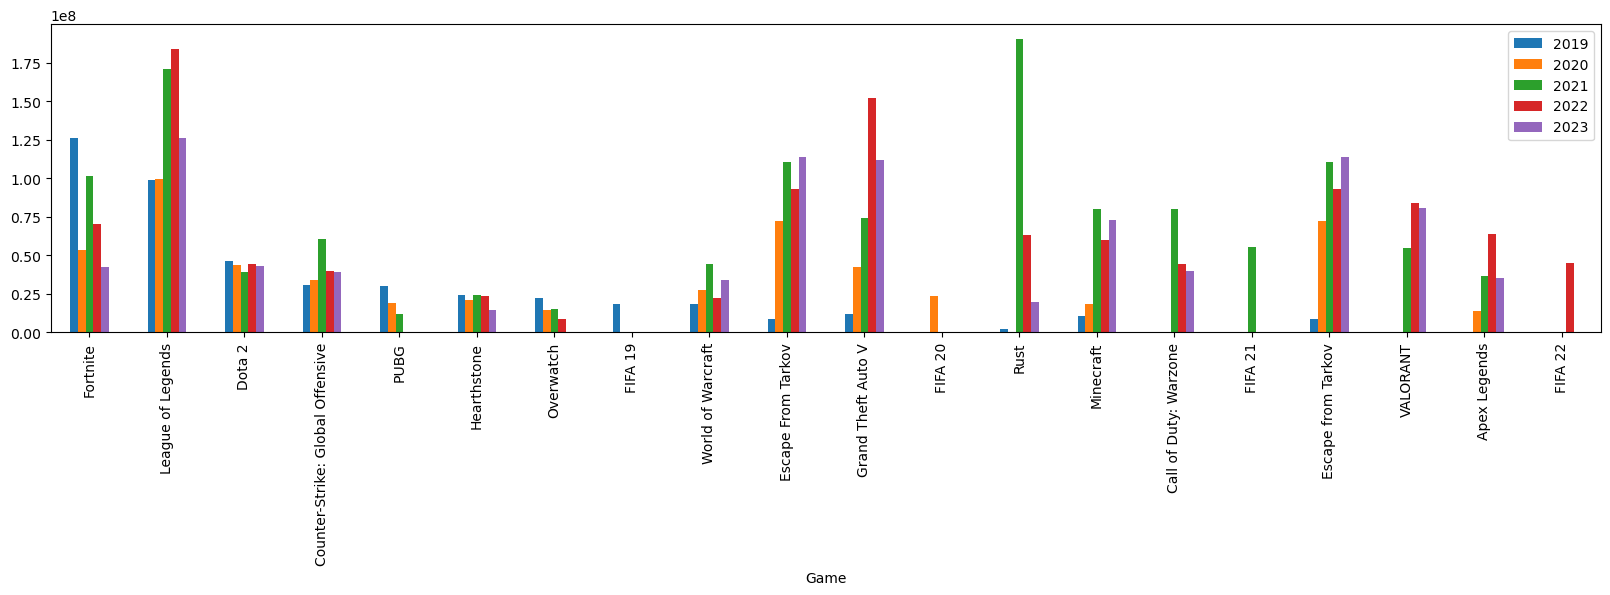

In [185]:

G.plot(kind="bar", figsize=(20,4))


## Open highest earning players create a graph to compare

In [186]:
Earnings = pd.read_csv("Highest_earning_players.csv")
Earnings


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [187]:
Game_earnings = Earnings.groupby(['Game'])['TotalUSDPrize'].sum().sort_values(ascending=True)
Game_earnings1 = pd.DataFrame(Game_earnings)
Game_earnings1

#Game_earnings.plot(x='Game', y='TotalUSDPrize', kind='bar')
                 



,TotalUSDPrize
Game,
Arena of Valor,8.333952e+06
Heroes of the Storm,1.178045e+07
Overwatch,1.234781e+07
PUBG,1.244196e+07
Hearthstone,1.333564e+07
Starcraft II,2.537982e+07
League of Legends,3.504348e+07
Fortnite,4.340937e+07
Counter-Strike: Global Offensive,5.654192e+07


<Axes: xlabel='Game'>

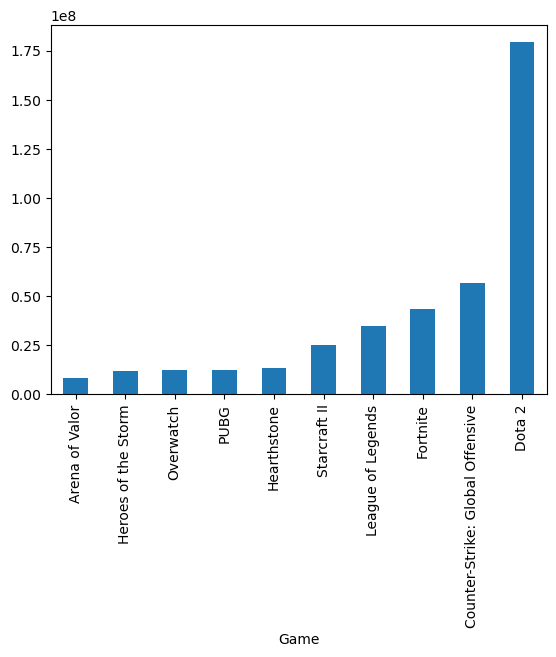

In [188]:
Game_earnings.plot(x='Game', y='TotalUSDPrize', kind='bar')

## Merging Twitch data Highest viewership with TTL USD prizes E-Sports to find best games to play for money

In [192]:
#Pull out the previous years
G1 = Games_updated1[['Game','2023']].copy()
#merge new 2023 twitch subscription numbers with E-Sport ttl prize money
G2 = pd.merge(G1,Game_earnings1, on ='Game') 
#rename 2023 column
G2.rename(columns = {'2023':'2023 Twitch viewership'}, inplace = True)
# Place Game as Index
G3 = G2.set_index('Game')
G4 = G3.loc[(G3['2023 Twitch viewership'] != 0)] 
G4
#All_Top_10 = twitch_by_game.loc[(twitch_by_game["Rank"] < 11) & (twitch_by_game["Month"] == 1) & (twitch_by_game["Year"] > 2015)]

,2023 Twitch viewership,TotalUSDPrize
Game,,
Fortnite,42715772,4.340937e+07
League of Legends,126494155,3.504348e+07
Dota 2,43317513,1.791788e+08
Counter-Strike: Global Offensive,39153067,5.654192e+07
Hearthstone,14337831,1.333564e+07


## Current top games to make monet on twitch and also top 10 highest ttl payout in tournaments

<Axes: xlabel='Game'>

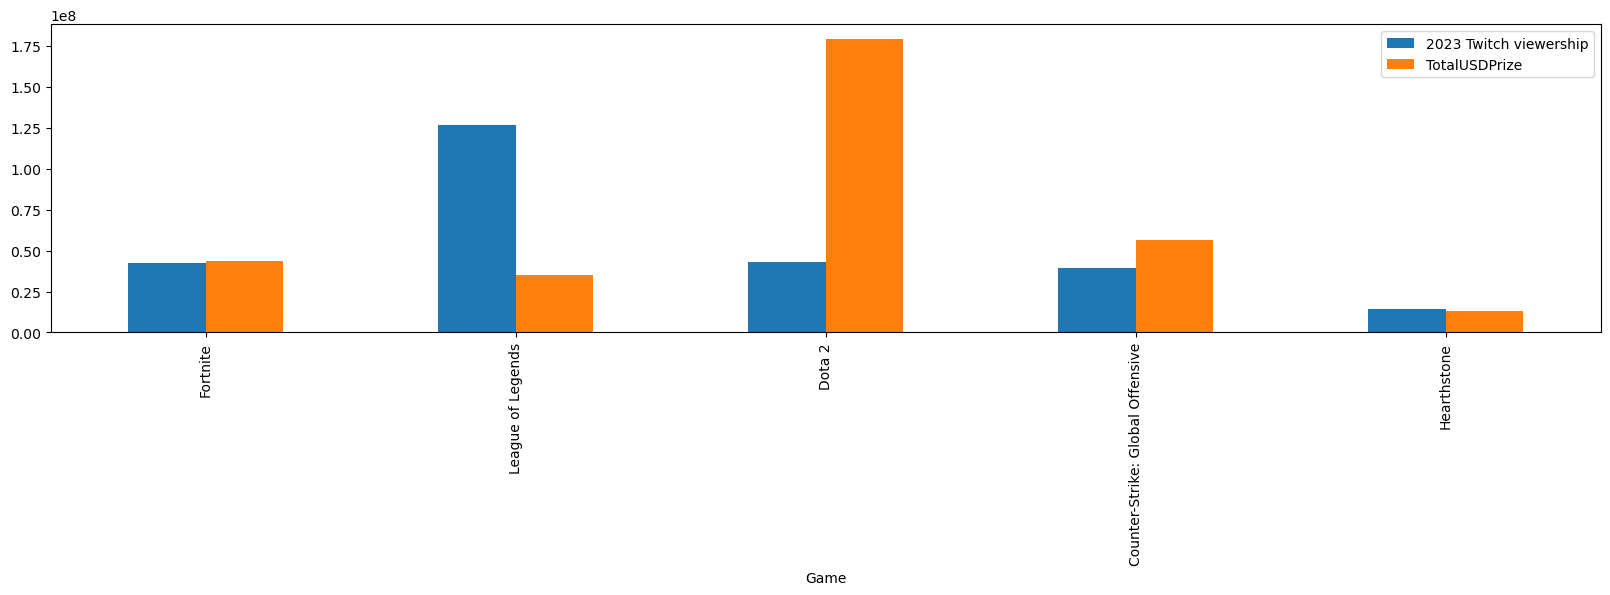

In [193]:
G4.plot(kind="bar", figsize=(20,4))

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
import locale
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

Comparing earnings trends between E-Sports and Active Sports

E-Sports Data Clean Up

In [2]:
# Open and read csv
esports_earnings = pd.read_csv("Esports Earnings Data_2013 to 2021.csv")
esports_earnings

,Player ID,ID,Name,Earnings (Year),Earnings (Overall),Unnamed: 5,Year
0,1,Finland JerAx,Jesse Vainikka,"$3,163,536.20","$6,486,948.78",48.77%,2019
1,2,France Ceb,Sébastien Debs,"$3,163,536.20","$5,824,509.40",54.31%,2019
2,3,Finland Topson,Topias Taavitsainen,"$3,163,536.20","$5,699,189.00",55.51%,2019
3,4,Denmark N0tail,Johan Sundstein,"$3,155,536.20","$7,184,163.05",43.92%,2019
4,5,Australia ana,Anathan Pham,"$3,146,536.20","$6,024,411.96",52.23%,2019
...,...,...,...,...,...,...,...
895,96,China BurNIng,"Xu, Zhilei","$40,770.84","$896,625.35",4.55%,2013
896,97,Estonia puszu,Johannes Uibos,"$40,000.00","$40,254.31",99.37%,2013
897,98,United States charley25k,- -,"$40,000.00","$40,000.00",100.00%,2013
898,99,United States Chris Tomkinson,Chris Tomkinson,"$40,000.00","$40,000.00",100.00%,2013


In [3]:
#Remove columns Earnings(Year) and Unnamed:5
columns_to_drop = ["Player ID", "Earnings (Year)", "Unnamed: 5"]

# Drop the specified columns
clean_esports_earnings = esports_earnings.drop(columns_to_drop, axis=1)

# Print the updated DataFrame
clean_esports_earnings

,ID,Name,Earnings (Overall),Year
0,Finland JerAx,Jesse Vainikka,"$6,486,948.78",2019
1,France Ceb,Sébastien Debs,"$5,824,509.40",2019
2,Finland Topson,Topias Taavitsainen,"$5,699,189.00",2019
3,Denmark N0tail,Johan Sundstein,"$7,184,163.05",2019
4,Australia ana,Anathan Pham,"$6,024,411.96",2019
...,...,...,...,...
895,China BurNIng,"Xu, Zhilei","$896,625.35",2013
896,Estonia puszu,Johannes Uibos,"$40,254.31",2013
897,United States charley25k,- -,"$40,000.00",2013
898,United States Chris Tomkinson,Chris Tomkinson,"$40,000.00",2013


In [4]:
# Convert the 'Earnings (Overall)' column to numeric
clean_esports_earnings['Earnings (Overall)'] = clean_esports_earnings['Earnings (Overall)'].str.replace('$', '').str.replace(',', '').astype(float)

# Filter the DataFrame for the years 2019, 2020, and 2021
selected_years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
filtered_data = clean_esports_earnings[clean_esports_earnings['Year'].isin(selected_years)]

# Group the data by year and select the top 10 earners for each year
top_10_esports_earners = filtered_data.groupby('Year').apply(lambda x: x.nlargest(10, 'Earnings (Overall)')).reset_index(drop=True)
top_10_esports_earners

,ID,Name,Earnings (Overall),Year
0,Germany KuroKy,Kuro Takhasomi,5288547.73,2013
1,Estonia Puppey,Clement Ivanov,4222572.80,2013
2,Sweden s4,Gustav Magnusson,2749353.74,2013
3,China Hao,"Chen, Zhihao",1761646.83,2013
4,"Korea, Republic of Faker","Lee, Sang Hyeok",1470490.14,2013
...,...,...,...,...
85,Russian Federation TORONTOTOKYO,Alexander Khertek,3995773.90,2021
86,Ukraine Mira,Miroslaw Kolpakov,3994807.25,2021
87,China Ame,"Wang, Chunyu",3912904.27,2021
88,China Faith_bian,"Zhang, Ruida",3847426.86,2021


Active Sports Data Clean Up

In [5]:
active_sports_earnings = pd.read_csv("Sports Earnings Data_2013 to 2021.csv")
active_sports_earnings

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball
...,...,...,...,...
1654,Patrick Ewing,4.2,1990,Basketball
1655,Greg LeMond,4.2,1990,Cycling
1656,Gerhard Berger,4.0,1990,Racing
1657,Curtis Strange,3.8,1990,Golf


In [6]:
#Rename the Earnings column
clean_active_sports_earnings = active_sports_earnings.rename(columns={"Earnings": "Earnings (Overall)"})
clean_active_sports_earnings

,Name,Earnings (Overall),Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball
...,...,...,...,...
1654,Patrick Ewing,4.2,1990,Basketball
1655,Greg LeMond,4.2,1990,Cycling
1656,Gerhard Berger,4.0,1990,Racing
1657,Curtis Strange,3.8,1990,Golf


In [7]:
# Set the locale for formatting currency
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Format "Earnings (Overall)" column as currency
clean_active_sports_earnings["Earnings (Overall)"] = clean_active_sports_earnings["Earnings (Overall)"].apply(
    lambda x: locale.currency(x * 1e6, grouping=True)
)

# Print the updated DataFrame
clean_active_sports_earnings

,Name,Earnings (Overall),Year,Sport
0,Conor McGregor,"$180,000,000.00",2021,Mixed Martial Arts
1,Lionel Messi,"$130,000,000.00",2021,Soccer
2,Cristiano Ronaldo,"$120,000,000.00",2021,Soccer
3,Dak Prescott,"$107,500,000.00",2021,Football
4,LeBron James,"$96,500,000.00",2021,Basketball
...,...,...,...,...
1654,Patrick Ewing,"$4,200,000.00",1990,Basketball
1655,Greg LeMond,"$4,200,000.00",1990,Cycling
1656,Gerhard Berger,"$4,000,000.00",1990,Racing
1657,Curtis Strange,"$3,800,000.00",1990,Golf


In [8]:
# # Convert the 'Earnings (Overall)' column to numeric
clean_active_sports_earnings['Earnings (Overall)'] = clean_active_sports_earnings['Earnings (Overall)'].str.replace('$', '').str.replace(',', '').astype(float)

# Filter the DataFrame for the years 2019, 2020, and 2021
#selected_years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
filtered_data2 = clean_active_sports_earnings[clean_active_sports_earnings['Year'].isin(selected_years)]

# Group the data by year and select the top 10 earners for each year
top_10_active_sports_earners = filtered_data2.groupby('Year').apply(lambda x: x.nlargest(10, 'Earnings (Overall)')).reset_index(drop=True)
top_10_active_sports_earners

,Name,Earnings (Overall),Year,Sport
0,Tiger Woods,78100000.0,2013,Golf
1,Roger Federer,71500000.0,2013,Tennis
2,Kobe Bryant,61900000.0,2013,Basketball
3,LeBron James,59800000.0,2013,Basketball
4,Drew Brees,51000000.0,2013,Football
...,...,...,...,...
85,Neymar,95000000.0,2021,Soccer
86,Roger Federer,90000000.0,2021,Tennis
87,Lewis Hamilton,82000000.0,2021,Racing
88,Tom Brady,76000000.0,2021,Football


Esports - Scatter Plot

The r-squared is: 0.03216059438486572
The slope is: 111490.87468333336
The pvalue is: 0.09078558455687329
The std err is: 65198.49989288271
The intercept is: -220658029.20783895


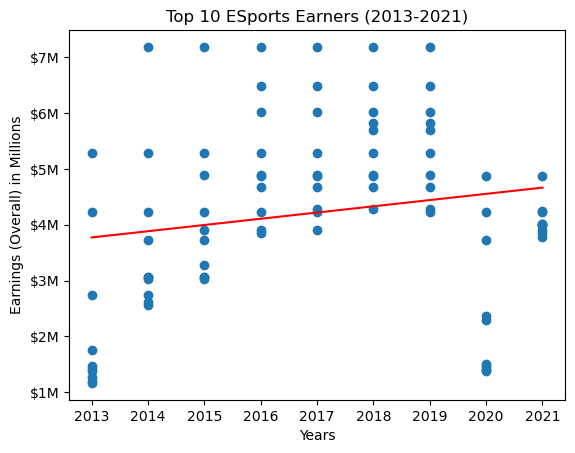

In [18]:
# Scatter Plot of Top 10 Esports Earners for the years 2015 to 2021
x_values = top_10_esports_earners['Year']
y_values = top_10_esports_earners['Earnings (Overall)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Years')
plt.ylabel('Earnings (Overall) in Millions')

# Format the y-axis labels to show values in millions
def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.title('Top 10 ESports Earners (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")

plt.savefig("output_data/Fig1.png")
plt.show()

Esports - Box Plot

The r-squared is: 0.03216059438486572
The slope is: 111490.87468333336
The pvalue is: 0.09078558455687329
The std err is: 65198.49989288271
The intercept is: -220658029.20783895


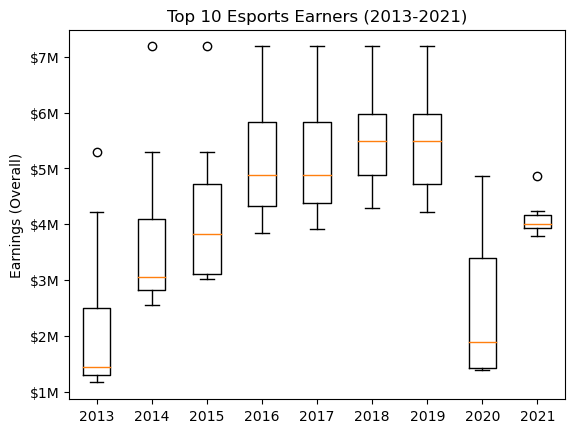

In [10]:
# Create a list of data frames, where each data frame represents the top 10 earners for a specific year
data_frames = [group[1] for group in top_10_esports_earners.groupby('Year')]

# Create a box plot using the list of data frames
plt.boxplot([df['Earnings (Overall)'] for df in data_frames])

# Set the x-axis labels to the years
plt.xticks(range(1, len(data_frames) + 1), [df['Year'].iloc[0] for df in data_frames])

# Set the y-axis label
plt.ylabel('Earnings (Overall)')

# Format the y-axis labels to show values in millions
def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the title of the box plot
plt.title('Top 10 Esports Earners (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig2.png")
# Display the plot
plt.show()

Active Sports -Scatter Plot

The r-squared is: 0.09546259590137013
The slope is: 4891333.333333332
The pvalue is: 0.003046214033649277
The std err is: 1605027.8374553928
The intercept is: -9784973777.777775


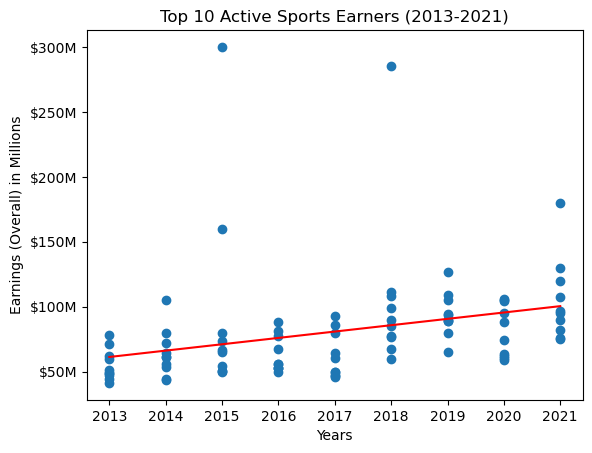

In [11]:
# Scatter Plot of Top 10 Active Sports Earners for the years 2015 to 2021
x_values = top_10_active_sports_earners['Year']
y_values = top_10_active_sports_earners['Earnings (Overall)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Years')
plt.ylabel('Earnings (Overall) in Millions')

# Format the y-axis labels to show values in millions
def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])  # Set the x-axis tick values
plt.title('Top 10 Active Sports Earners (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig3.png")
plt.show()

Active Sports - Box Plot

The r-squared is: 0.09546259590137013
The slope is: 4891333.333333332
The pvalue is: 0.003046214033649277
The std err is: 1605027.8374553928
The intercept is: -9784973777.777775


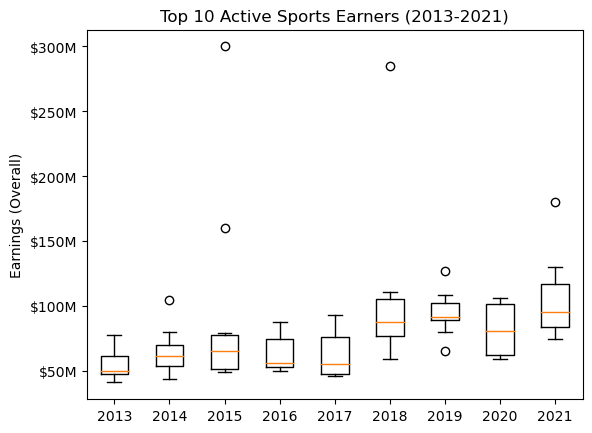

In [12]:
# Create a list of data frames, where each data frame represents the top 10 earners for a specific year
data_frames2 = [group[1] for group in top_10_active_sports_earners.groupby('Year')]

# Create a box plot using the list of data frames
plt.boxplot([df['Earnings (Overall)'] for df in data_frames2])

# Set the x-axis labels to the years
plt.xticks(range(1, len(data_frames2) + 1), [df['Year'].iloc[0] for df in data_frames2])

# Set the y-axis label
plt.ylabel('Earnings (Overall)')

# Format the y-axis labels to show values in millions
def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the title of the box plot
plt.title('Top 10 Active Sports Earners (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig4.png")
# Display the plot
plt.show()

Average Top 10 Esports Earnings Per Year 

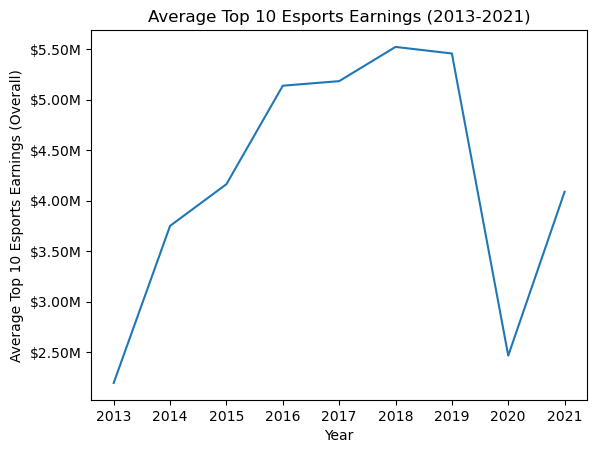

In [13]:
# Group the data by year and calculate the average earnings per year
average_top10_sports_earnings_per_year = top_10_esports_earners.groupby('Year')['Earnings (Overall)'].mean()

# Create a line plot using the average earnings per year
plt.plot(average_top10_sports_earnings_per_year.index, average_top10_sports_earnings_per_year.values)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Top 10 Esports Earnings (Overall)')

def millions_formatter(x, pos):
    return f"${x/1e6:.2f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the title of the line plot
plt.title('Average Top 10 Esports Earnings (2013-2021)')

plt.savefig("output_data/Fig5.png")

# Display the plot
plt.show()

Average Top 10 Active Sports Earnings Per Year 

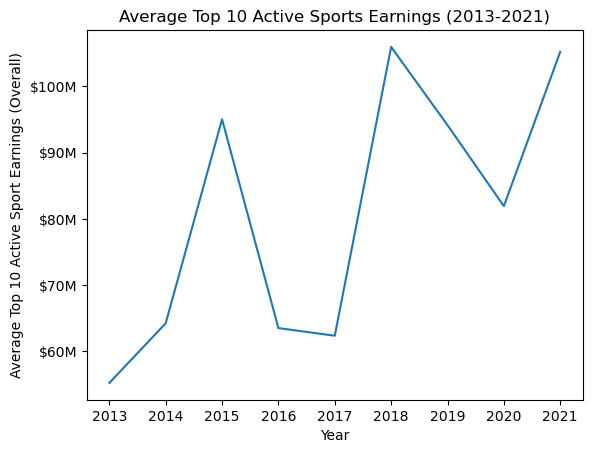

In [14]:
# Filter the data to include only years 2013 to 2021
average_top10_active_sports_earnings_per_year = top_10_active_sports_earners.groupby('Year')['Earnings (Overall)'].mean()
filtered_data4 = average_top10_active_sports_earnings_per_year.loc[2013:2021]

# Create a line plot using the filtered data
plt.plot(filtered_data4.index, filtered_data4.values)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Top 10 Active Sport Earnings (Overall)')

def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the x-axis tick values for the years 2013 to 2021
plt.xticks(range(2013, 2022))

# Set the title of the line plot
plt.title('Average Top 10 Active Sports Earnings (2013-2021)')

plt.savefig("output_data/Fig6.png")

# Display the plot
plt.show()

Average Esports Earnings Per Year

The r-squared is: 0.09546259590137013
The slope is: 4891333.333333332
The pvalue is: 0.003046214033649277
The std err is: 1605027.8374553928
The intercept is: -9784973777.777775


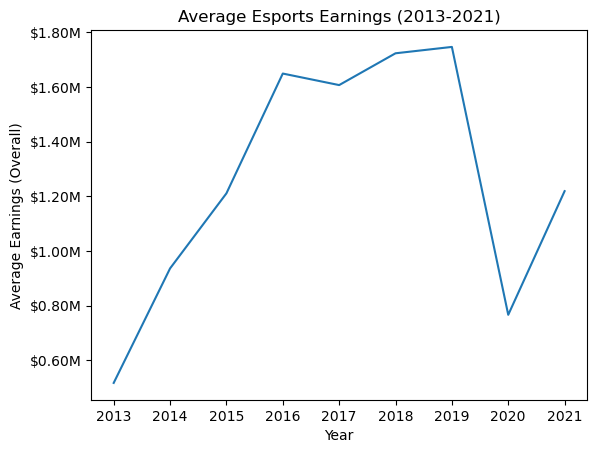

In [15]:
# Group the data by year and calculate the average earnings per year
average_esports_earnings_per_year = clean_esports_earnings.groupby('Year')['Earnings (Overall)'].mean()

# Create a line plot using the average earnings per year
plt.plot(average_esports_earnings_per_year.index, average_esports_earnings_per_year.values)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Earnings (Overall)')

def millions_formatter(x, pos):
    return f"${x/1e6:.2f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the title of the line plot
plt.title('Average Esports Earnings (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig7.png")

# Display the plot
plt.show()

Average Active Sports Earnings Per Year

The r-squared is: 0.09546259590137013
The slope is: 4891333.333333332
The pvalue is: 0.003046214033649277
The std err is: 1605027.8374553928
The intercept is: -9784973777.777775


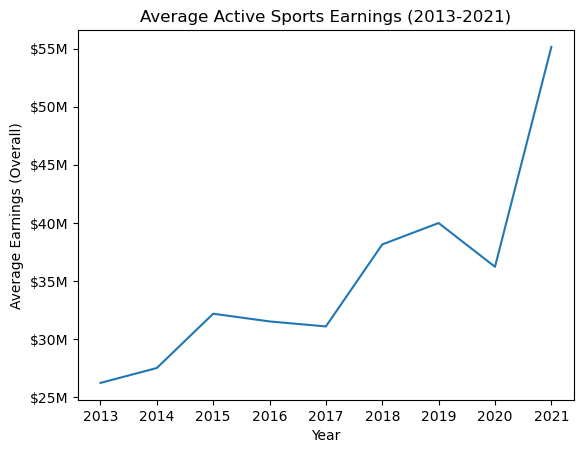

In [16]:
# Filter the data to include only years 2013 to 2021
average_active_sports_earnings_per_year = clean_active_sports_earnings.groupby('Year')['Earnings (Overall)'].mean()
filtered_data3 = average_active_sports_earnings_per_year.loc[2013:2021]

# Create a line plot using the filtered data
plt.plot(filtered_data3.index, filtered_data3.values)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Earnings (Overall)')

def millions_formatter(x, pos):
    return f"${x/1e6:.0f}M"

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the x-axis tick values for the years 2013 to 2021
plt.xticks(range(2013, 2022))

# Set the title of the line plot
plt.title('Average Active Sports Earnings (2013-2021)')
print(f"The r-squared is: {rvalue**2}")
print(f"The slope is: {slope}")
print(f"The pvalue is: {pvalue}")
print(f"The std err is: {stderr}")
print(f"The intercept is: {intercept}")
plt.savefig("output_data/Fig8.png")

# Display the plot
plt.show()

Add a stats test - t-test sample

In [17]:
import scipy.stats as stats

top_10_esports_earnings = top_10_esports_earners['Earnings (Overall)']
top_10_active_sports_earnings = top_10_active_sports_earners['Earnings (Overall)']

t_statistic, p_value = stats.ttest_ind(top_10_esports_earnings, top_10_active_sports_earnings)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


T-Statistic: -17.67153631041991
P-Value: 5.132170911238922e-41
